# Exploratory Data Analysis
## Using the Iris Dataset

### Loading a new dataset into a Pandas DataFrame
The first thing you can do is take a look at the format of the data. The `head()` method on the dataframe prints the first few rows.

In [15]:
import pandas as pd
iris_dataset = pd.read_csv('iris.csv')
del iris_dataset['Id']
iris_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Statistical Overview of Our Data Set
## Describe()
Using the `describe()` method on the DataFrame automatically outputs several statistically signifigant values in a single table. 

In [16]:
iris_dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# First Plot
## Boxplot
The boxplot is a good way to contextualize data. It gives you a visual representation of average values for each feature, plus their deviations. 

It is also very useful that you can see the ranges of each feature next to each other. 

<AxesSubplot:>

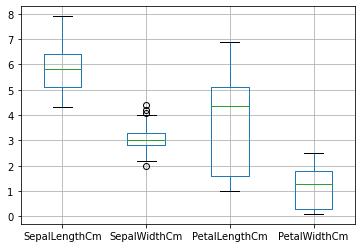

In [17]:
iris_dataset.boxplot()

In [18]:
iris_dataset.quantile([0.1, 0.9])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0.1,4.8,2.50,1.4,0.2
0.9,6.9,3.61,5.8,2.2


# Extra Analysis
The following are a few extra analysis functions that could reveal more about the dataset. 
> Note we select only the numeric columns for the following methods. 

## Mean
Analyzing the average of each feature can help give a sense of scale for the data. 

## Median
Not incredibly useful on its own, but when you consider it in relation to the average, it can reveal some interesting details about the dataset. 

## Standard Deviation
This can simply tell you how wildly your data set varies. 

In [22]:
print(iris_dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].mean())
print(iris_dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].median())
print(iris_dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].std())

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64
SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64
SepalLengthCm    0.828066
SepalWidthCm     0.433594
PetalLengthCm    1.764420
PetalWidthCm     0.763161
dtype: float64


# Analyzing Categorical Data
Pulling unique values from categorical data obviously reveals all of the possible categories, but can also tell you if you need to clean up your data. 

In [23]:
iris_dataset.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Crosstab
Using a cross table as shown below can show how strongly related two features are. 

In [24]:
pd.crosstab(iris_dataset.PetalWidthCm > iris_dataset.PetalWidthCm.mean(), iris_dataset.PetalLengthCm > iris_dataset.PetalLengthCm.mean())

PetalLengthCm,False,True
PetalWidthCm,,
False,56,4
True,1,89


# Custom Plots
Based on the information revealed from the crosstab above, we can further prove that Petal Width and Petal Length are strongly connected by plotting them together. 

Text(0, 0.5, 'Petal Length')

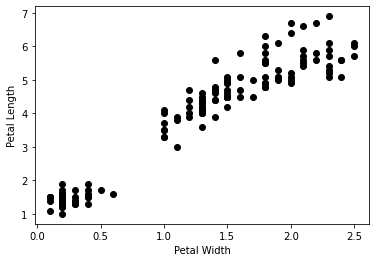

In [25]:
import matplotlib.pyplot as plt
plt.scatter(iris_dataset.PetalWidthCm, iris_dataset.PetalLengthCm, alpha=1.0, color='k')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')

# HIstograms
Histograms are the best way to see how a certain feature is distributed in your data set. This is yet another graphical representation of scale. 

Text(0.5, 0, 'Petal Width Distribution')

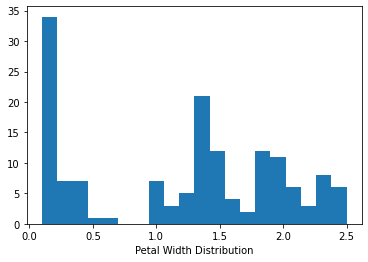

In [26]:
plt.hist(iris_dataset.PetalWidthCm, bins=20)
plt.xlabel('Petal Width Distribution')